<a href="https://colab.research.google.com/github/DevanshMistry890/DataVisualization/blob/main/Students_Performance_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Data Visualization*
Devansh Mistry

In this notebook, I will be showing you how to use visulization to analyse data in Python using various packages.

Inspired by [Kaggle dataset](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

---

# Introduction
We will explore data about students. We will figure out which factors effect most in achieving his last score. The independent variables are follow:

1. Gender : sex of students
2. Ethnicity : ethnicity of students
3. Parental level of education : parents' final education
4. Lunch : having lunch before test (normal or abnormal)
5. Test preparation course : complete or not complete before test


## Importing required Libraries and Dataset

In [2]:
#importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
#reading csv data using pandas
Stdper_df = pd.read_csv("StudentsPerformance.csv")

## Reading Dataset and Pre-processing if required

In [4]:
Stdper_df.head()

,Gender,Ethnicity,Parent_education,Lunch,Pre,Math,Reading,Writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
Stdper_df.dtypes #checking for data pre-processing

Gender              object
Ethnicity           object
Parent_education    object
Lunch               object
Pre                 object
Math                 int64
Reading              int64
Writing              int64
dtype: object

## Visulization and analysis

let's figure out the performance of each field with respect to Gender.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


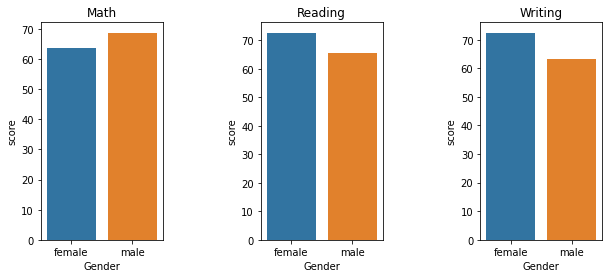

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = Stdper_df.groupby("Gender")[list(Stdper_df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(Stdper_df.columns[-3:])[idx])    
plt.show()

We can see that male has better performance on math field, but worse on reading and writing. Secondly, see the performance of ethnicity.

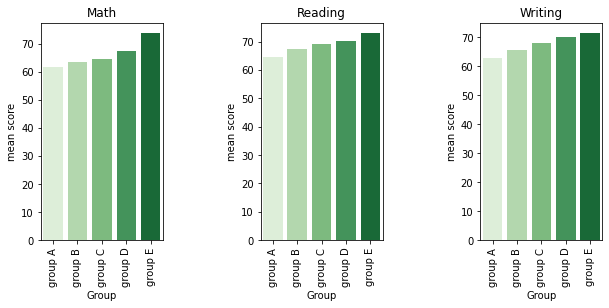

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = Stdper_df.groupby("Ethnicity")[list(Stdper_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(Stdper_df.columns[-3:])[idx])
plt.show()

Obviously, group E has best performance for all the fields, and group A is the worst.

Then let's see the result of score and test preparation.

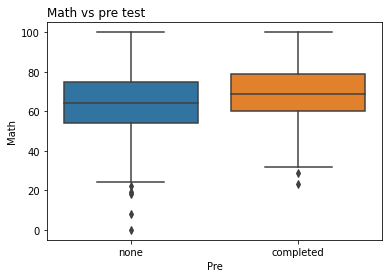

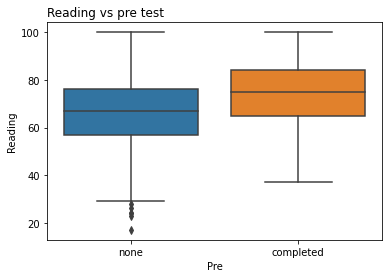

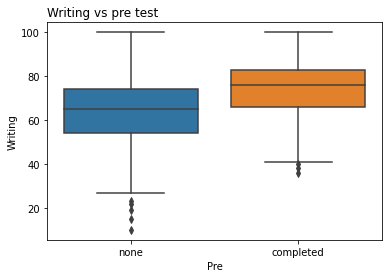

In [ ]:
for item in Stdper_df.columns[-3:]:
    sns.boxplot(x=Stdper_df["Pre"], y=Stdper_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

The score distribution got narrower if students complete the preparation before test, and also we can see that the average of the score is better.

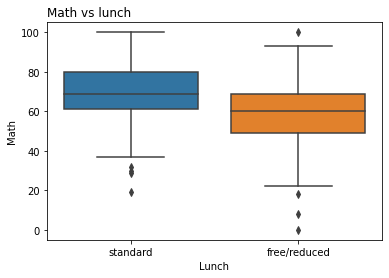

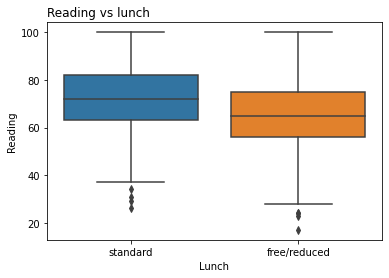

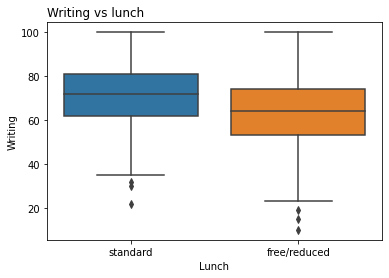

In [ ]:
for item in Stdper_df.columns[-3:]:
    sns.boxplot(x=Stdper_df["Lunch"], y=Stdper_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

Students are easier to get better score once they eat standardly.

We check the data type earily. Then we transform some features by label encoder.

In [ ]:
labelencoder = LabelEncoder()
train_df = Stdper_df.copy()
train_df["Parent_education"] = labelencoder.fit_transform(train_df["Parent_education"])
train_df["Pre"] = labelencoder.fit_transform(train_df["Pre"])
train_df["Lunch"] = labelencoder.fit_transform(train_df["Lunch"])
train_df.head()

,Gender,Ethnicity,Parent_education,Lunch,Pre,Math,Reading,Writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


Great! The features "Parent_education", "Lunch" and "Pre" are labeled by numbers. Next, we use KMeans argorithm to classify the dataset.

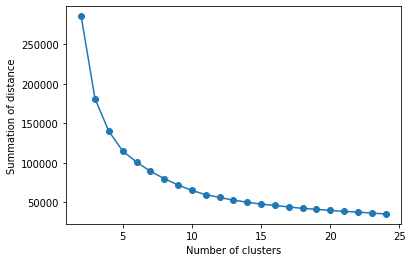

In [ ]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

We choose 8 as elbow point, and then classify all data.

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
Stdper_df["classification"] = kmeans_label
Stdper_df.head(10)

,Gender,Ethnicity,Parent_education,Lunch,Pre,Math,Reading,Writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,6
3,male,group A,associate's degree,free/reduced,none,47,57,44,5
4,male,group C,some college,standard,none,76,78,75,4
5,female,group B,associate's degree,standard,none,71,83,78,1
6,female,group B,some college,standard,completed,88,95,92,6
7,male,group B,some college,free/reduced,none,40,43,39,3
8,male,group D,high school,free/reduced,completed,64,64,67,7
9,female,group B,high school,free/reduced,none,38,60,50,0


After classifing the data, let's see the performance of each cluster.

In [ ]:
class_df = Stdper_df.groupby("classification")[Stdper_df.columns[-4:-1]].mean()
class_df

,Math,Reading,Writing
classification,,,
0,50.292453,61.169811,60.169811
1,73.984496,83.457364,82.922481
2,63.676923,72.092308,72.194872
3,32.358974,36.589744,34.025641
4,80.067164,75.477612,73.283582
5,50.918519,50.444444,48.288889
6,89.145455,91.618182,91.336364
7,66.618421,62.052632,60.447368


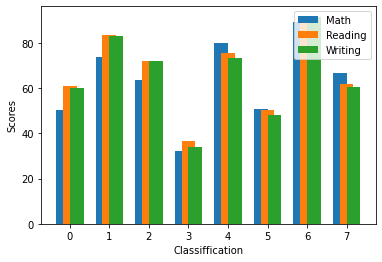

In [ ]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.Math, width, label='Math')
rects2 = ax.bar(ind, class_df.Reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.Writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

Up to now, it's obviously that all subject of cluster has the same trend, so we choose the average of all sbjects to rank the clusters

In [ ]:
class_df["total_ave_score"] = (class_df.Math + class_df.Reading + class_df.Writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([6, 1, 4, 2, 7, 0, 5, 3], dtype='int64', name='classification')

In [ ]:
rank

classification
6    90.700000
1    80.121447
4    76.276119
2    69.321368
7    63.039474
0    57.210692
5    49.883951
3    34.324786
Name: total_ave_score, dtype: float64

For top5 rank, the average score all passed, Rank0 is the best cluster, Rank1 is second one and so on.

From now on, we can find out the correlation between the performance of students and features. Let's plot pie chart to see whether parents education level can affect the performance or not.

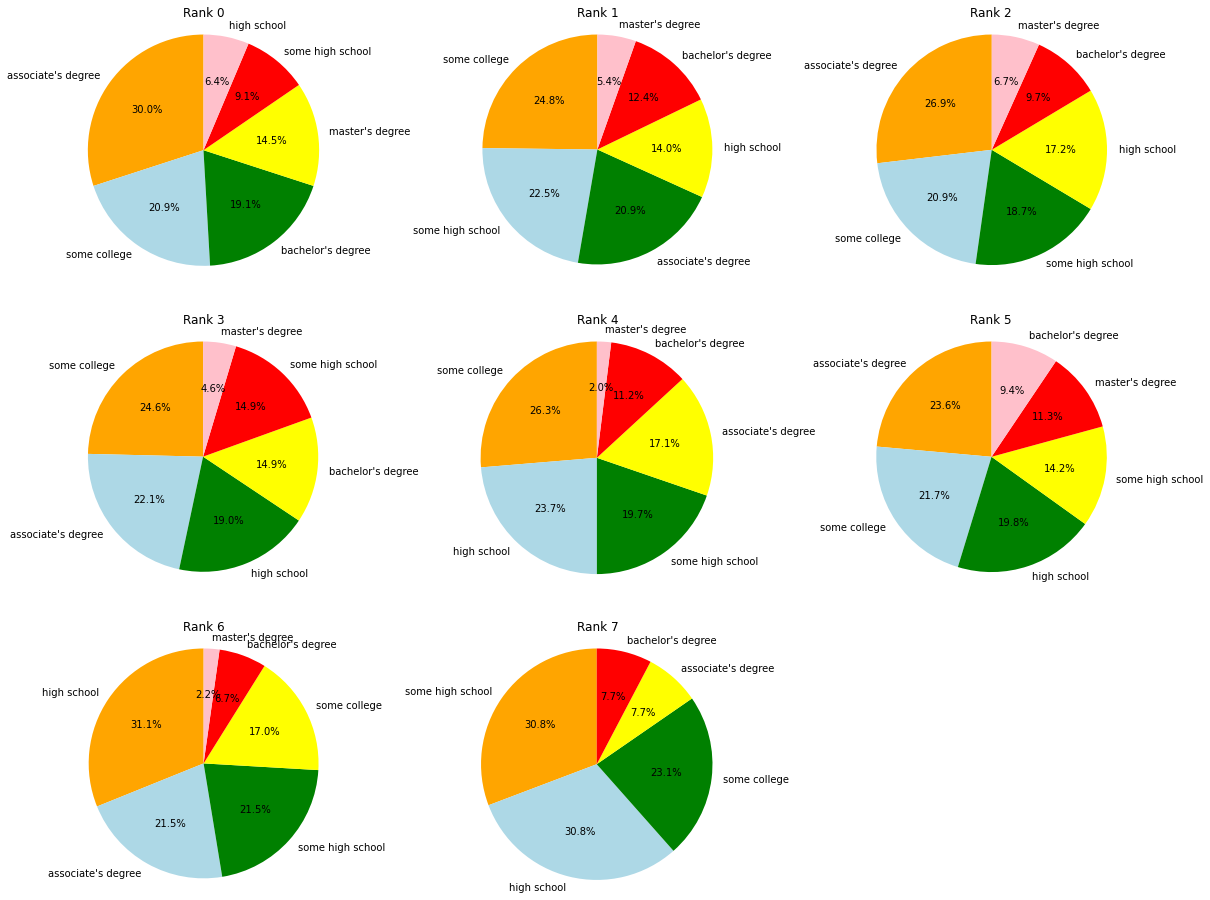

In [ ]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = Stdper_df[Stdper_df["classification"]==rank.index[idx]]
        percentage_of_Parent_edu = num[column].value_counts()
        percentage_of_Parent_edu.sort_index()
        label = percentage_of_Parent_edu.index
        value = percentage_of_Parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("Parent_education")

Let's make things clear:
High degree of education - Parents having bachelor or master degree are high-level educated. So we focus on these two terms.

As pie chart were shown above, we can easily understand the ratio of high-degree education. For the rank0, its ratio is around 32%. In addition, there are no differences between rank1 to rank3, and the ratio are around 15~17%. Finally, the ratio is only 8% in rank7.

We calculated the average score of each rank before, so we can say that parent's education affect the score but not obviously, because there are still 70%~80% parents without high education degree.

Let's now test preparation course.

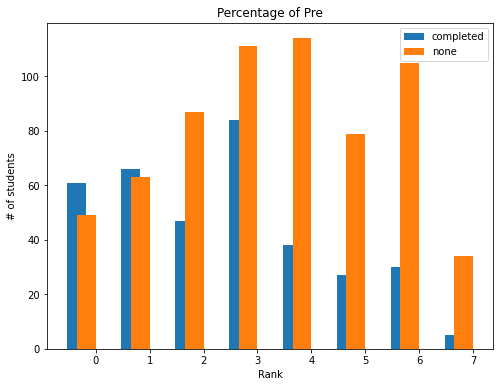

In [ ]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = Stdper_df[Stdper_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = Stdper_df[Stdper_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("Pre")

Over 50% of students in rank0 completed the test preparation course, and normally there is about 70~80% students in rank7 hadn't finished course. It is say that preparation course can help students get better score.

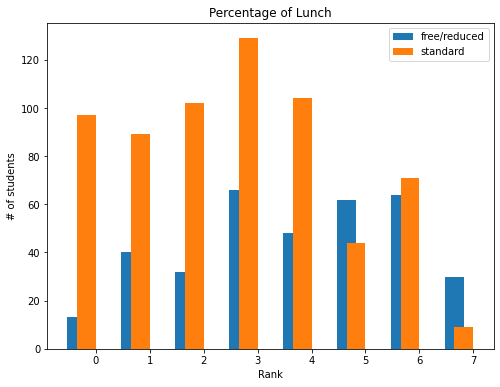

In [ ]:
plot_bar_chart("Lunch")

Students who had lunch before test got better score. That is, it's hard to get good performance without eating.

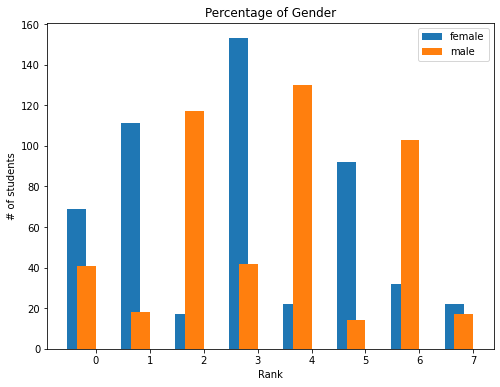

In [ ]:
plot_bar_chart("Gender")

here male is better than female.

# Conclusion
There are few conclusions below:

1. Parents' education level may affect the performance of students, but not the important one.
2. Finishing preparation course is benefitial.
3. Having lunch is important to students, and it is also the most significant one.
4. Gender has no correlation with the score.

In summary, if students want to have good performance, they should have enough nutrient and make effort to prepare the test.